# pytorch neural network classification

- **Regression** is predicting a number (chp1)
- **Classification** is predicting a thing (this, chp2)

![Mulclass classification workflow](./images/multiclass.png)

| Binary | Multiclass |
|--------|------------|
| has only two categories eg: an image is either a dog or cat | has more than two categories eg: a picture of a dish could be sushi, steak, spag, or pizza |


**what we're going to cover**
- architecture of a neural network classification model
- input shapes and output shapes of a classification model (features and labels)
- creating custom data to view, fit on and predict on
- steps in modelling
  - creating a model, setting a loss function and optimizer, creating a training loop, evaluating a model
- saving and loading models
- harnessing the power of non-linearity
- different classification evaluation methods

### make classification data and get it ready

In [ ]:
import sklearn 
from sklearn.datasets import make_circles 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 




In [ ]:
# remember equation of a circle: x^2 + y^2 = 1
# so the make_circles will produce two features and one target

# make 1000 samples 
samples = 1000

# create circles
X, y = make_circles(samples,
                    random_state=97,
                    noise=0.03,
                    )

print( len(X), len(y) )
print(
    f'first few samples of X: {X[:5]} \nfirst few samples of y: {y[:5]}'
)

In [ ]:
# make a dataframe of circles data

circlesdf = pd.DataFrame({'X1': X[:, 0],
                          'X2': X[:, 1],
                          'label': y}
                          )
circlesdf.head()

In [ ]:
# visualize the circlesdf
plt.scatter(x=circlesdf.iloc[:,0],
            y=circlesdf.iloc[:,1],
            c=circlesdf.iloc[:,2],
            cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
circlesdf.iloc[:,1]

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.datasets import make_circles 


RANDOM_STATE = 97 # random variable for all random states

### creating a toy dataset for our classification task

In [ ]:
samples = 1000 # number of samples
X, y = make_circles(samples, 
                    random_state=RANDOM_STATE,
                    noise=0.07)

# creating a dataframe for our top dataset 
circles_df = pd.DataFrame({'x1': X[:,0],
                           'x2': X[:,1],
                           'label':y})
circles_df.head()

In [ ]:
# vizualize, vizualize, visualize our data
plt.figure(figsize=(5,5))
plt.scatter(x=circles_df['x1'], y=circles_df['x2'], c=circles_df['label'], cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# check input and output shapes
X.shape, y.shape

In [ ]:
X

### convert data into tensors and create train and test splits

In [ ]:
import torch 

the `.type(torch.float)` is used to convert the default float64 to float32

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


X[:5], y[:5]

### splitting our data set into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                shuffle=True,
                                                random_state=RANDOM_STATE)

len(xtrain), len(xtest), len(ytrain), len(ytest)




### building a model to classify our blue and red dots

to do list:
- setup device agnostic code (put tensors on gpu if it exits)
- construct a model 
- define a loss function and optimizer
- create a training loop and test loop

In [ ]:
import torch 
from torch import nn 


device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class CircleClassify(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x
    
mdl = CircleClassify().to(device)
mdl


In [ ]:
mdl.state_dict()

In [ ]:
# using nn.Sequential()

class CircleMdl(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(2, 5),
            nn.Linear(5, 1),
        )

    def forward(self, x):
        return self.feature_extractor(x)

mdl2 = CircleMdl().to(device)
mdl2 


In [ ]:
mdl2.state_dict()

In [ ]:
# make initial predictions 
with torch.inference_mode():
    untrained_preds = mdl2(xtest.to(device))

print(f'length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}')
print(f'length of test samples: {len(xtest)}, shape: {xtest.shape}')
print(f'\nfirst 10 predictions:\n{untrained_preds[:10]}')
print(f'\nfirst 10 labels:\n{ytest[:10]}')

- get dataset (visualize data)
- split into train and test sets
- create model
- define loss function 
- choose optimizer
- create training loop
- create testing loop


In [ ]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split

RANDOM_STATE = 29
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# creating toy dataset using the make circle from sklearn
samples_size = 3000

x, y = make_circles(samples_size,
                    noise=.06,
                    random_state=RANDOM_STATE)

# visualizing the data
plt.figure(figsize=(6,5))
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.title('Classification Toy Data')
plt.show()

In [ ]:
# converting arrays into tensors
x = torch.from_numpy(x).type(torch.float).to(device) # converting it to torch32
y = torch.from_numpy(y).type(torch.float).to(device)

x.dtype, y.dtype

In [ ]:
# splitting dataset into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, shuffle=True, train_size=0.7, random_state=RANDOM_STATE)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape 

In [ ]:
# creating a simple classification model

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x):
        return self.layer2(self.layer1(x))
    

mymdl = SimpleNet().to(device)


In [ ]:
# define loss function and choose optimizer 
criterion = nn.BCELoss() # binary cross entropy loss

optimizer = torch.optim.Adam(mymdl.parameters(), lr=0.01)

In [ ]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split 
from torchsummary import summary


RANDOM_STATE = 28
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# dataset
make_samples = 10000
x, y = make_circles(
    make_samples,
    noise=0.07,
    random_state=RANDOM_STATE
)
print(x.shape, y.shape)

# visualize data
plt.figure(figsize=(6,5)) 
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu, s=3)
plt.show()

# create tensor dataset and split into train and test sets
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y,
    train_size=.7,
    random_state=RANDOM_STATE
)
print(
    f'Train set shape (x,y): {xtrain.shape}, {ytrain.unsqueeze_(-1).shape} \
    \nTest set shape (x,y): {xtest.shape}, {ytest.unsqueeze_(-1).shape}'
)

In [ ]:
# creating model 
class BinaryClassifier(nn.Module):
    def __init__(self, nclasses=2):
        super().__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x:torch.Tensor):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

model = BinaryClassifier()
summary(model, (xtrain.shape))

In [ ]:
model.state_dict()

In [ ]:
# make predictions with untrained parameters

with torch.inference_mode():
    untrained_preds = model(xtest)

print(
    f'untrained preds: \n{untrained_preds[:5]}\nGround truth \n{ytest[:5]}'
)

**logits** are the raw values of a linear computation that is passed to an activation function. they become prediction probabilities when the are passed through an activation function (eg: sigmoid for binary classification, softmax for multi-class classification) <br>

Common loss functions for binary classification and their difference

| loss function | what has happened | 
|---------------|-------------------|
| `nn.BCELoss()` | requires the logits to have gone through the sigmoid activation function and thus the inputs should be squashed btween 0 and 1 |
| `nn.BCEWithLogitsLoss()` | has the sigmoid function built in so it requires the inputs to be logits |

**NB: `nn.BCEWithLogitsLoss()` is more stable, and it is recommended to use that for binary classification**

In [ ]:
# defining a loss function and choosing an optimizer
criterion = nn.BCEWithLogitsLoss() # has the sigmoid activatio function built-in

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# calculating accuracy - what percentage the model gets corrects

def accuracy_fn(ytrue, ypred):
    """ defining a custom accuracy function"""
    correct = torch.eq(ytrue, ypred).sum().item()
    acc = ( correct / len(ypred) ) * 100
    return acc 

- get data
- create model
- define loss function 
- choose optimizer

In [ ]:
import torch 
import torch.nn as nn 
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 73 

**dataset**

In [ ]:
# creating random categorical dataset with two classes

x, y = make_circles(5000, noise=0.07, random_state=RANDOM_STATE)
x = torch.from_numpy(x).type(torch.float).to(DEVICE)
y = torch.from_numpy(y).type(torch.float).unsqueeze(-1).to(DEVICE)

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                train_size=0.75,
                                                random_state=RANDOM_STATE,
                                                shuffle=True,
                                                stratify=y)

print(x[:5], y[:5])
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

**visualize the data**

In [ ]:
# visualize the data
plt.figure(figsize=(6,5))
plt.scatter(x[:,0], x[:,1], s=2, c=y, cmap=plt.cm.RdYlBu)
plt.show()

**create model**

In [ ]:
# create model 
class BinClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)    # binaary classification: output neuron = 1
        )

    def forward(self, x:torch.Tensor):
        return self.classifier(x)

torch.manual_seed(RANDOM_STATE)
bcmdl = BinClassification().to(DEVICE)

In [ ]:
bcmdl

In [ ]:
bcmdl.state_dict() # current random parameters

In [ ]:
# untrained weights for  predictions 
with torch.inference_mode():
    predictions = bcmdl(xtest)

print(predictions[:5])
print(ytest[:5]) 

**evaluation metric, loss function, and optimizer**

| optimizer | problem type | pytorch code |
|-------------------------|--------------|--------------|
| Stochastic Gradient Descent (SGD) optimizer | classification, regression, many others. | `torch.optim.SGD()` |
| Adam Optimizer | classification, regression, many others. | `torch.optim.Adam()` |
| | | |
| **loss function** | **problem type** | **pytorch code** |
| binary cross entropy loss | binary classification | `torch.nn.BCELossWithLogits` or `torch.nn.BCELoss` |
| cross entropy loss | multi-class classification | `torch.nn.CrossEntropyLoss` |
| mean absolute error (MAE) or L1 Loss | regression | `torch.nn.L1Loss` |
| mean squared error (MSE) or L2 Loss | regression | `torch.nn.MSELoss` |



In [ ]:
# evaluation metric
def check_accuracy(prediction, ground_truth):
    """
        CHECK ACCURACY:
            Input: predicted values, ground truth values
            Output: float 

            A simple code to calculate the percentage of
            correctly predicted values.
            i.e.: (true positives + true negatives) / total length 
    """
    correct = torch.eq(prediction, ground_truth).sum().item()
    acc = correct / len(ground_truth)
    return acc * 100

In [ ]:
# loss and optimizer 
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(bcmdl.parameters(), lr=0.1)

**again**

- our model outputs are goint to be raw **logits**
- we convert the logits into probabilities by passing it through an activation function (eg: sigmoid)
- **then we can convert our model's prediction probabilities to prediction labels by either `rounding` (for binary classification) them or taking the `argmax()` (for multi-class classification)**

for our prediction probability values, we need to perform a range-style rounding on them:
- ypred >= 0.5, y = 1 (class 1)
- ypred < 0.5, y = 0 (class 0)

**raw logits -> prediction probabilities -> class prediction**

**training loop and testing loop**

In [ ]:
epochs = 50

# put the data on target DEVICE
xtrain, ytrain = xtrain.to(DEVICE), ytrain.to(DEVICE)
xtest, ytest = xtest.to(DEVICE), ytest.to(DEVICE)

for epoch in range(epochs):
    # training loop 
    bcmdl.train()
    optimizer.zero_grad()
    ylogits = bcmdl(xtrain)#.squeeze()
    trainloss = criterion(ylogits, ytrain)
    trainloss.backward()
    optimizer.step()

    ypred = torch.round(torch.sigmoid(ylogits))
    trainacc = check_accuracy(ypred, ytrain)

    # evaluation loop
    bcmdl.eval()
    with torch.inference_mode():
        y_logits = bcmdl(xtest)#.squeeze()
        testloss = criterion(y_logits, ytest)

        predict_y = torch.round(torch.sigmoid(y_logits))
        testacc = check_accuracy(predict_y, ytest)

    # print out what's happening 
    if epoch % 10 == 0: # after every 10 epochs
        print(
            f'Epoch: {epoch} | Loss: {trainloss:.5f} | Acc: {trainacc:.2f} % | Test Loss: {testloss:.5f} | Test Acc: {testacc:.2f} %'
        )


**comment: our model doesn't seem to be learning anything since the accuracy is bouding around 50%. Synonymous to guessing (coin flip) if a data point is red or a blue dot** <br>

let's explore the possible reason this is occuring... visualize! visualize!! visualize!!!

In [ ]:
from helper_functions import plot_decision_boundary

In [ ]:
# plot decision boudning of our model 
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Train set')
plot_decision_boundary(bcmdl, xtrain, ytrain)

plt.subplot(1, 2, 2)
plt.title('Test set')
plot_decision_boundary(bcmdl, xtest, ytest)

**comment: our model is creating a linear line because our model is essentially made up of linear layers (lines)**

### Improving a model (from a model perspective)

1. Add more layers - give the model more chances to learn about the patterns in the data ...*(in our model above we only have two layers, we can increase them)*

2. Add more hidden units ...*(in our model above we could increase the hidden units from 5 to 10 or more to allow it to learn finer details of our data)*

3. Fit for longer ...*(we can increase the number of epochs)*

4. Change the learning rate ...*(we can reduce the lr=0.1 to a smaller number such as 0.01 or 0.001)*

5. Change the loss function ...*(we can explore the numerous loss function availabe in the documentation and check the performance)*

6. Change the optimizer ...*(we can use better optimization algorithm like RMSProp or Adam)*

**NOTE: in practice (a scientist) changes one thing at a time to see which tweak changes the accuracy the most**


In [ ]:
torch.manual_seed(RANDOM_STATE)

# creating a larger model 
class LargeBinaryMdl(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(2, 12),
            nn.ReLU(),
            nn.Linear(12, 25),
            nn.ReLU(),
            nn.Linear(25, 1)
        )
    def forward(self, x:torch.Tensor):
        return self.classifier(x)
    
model = LargeBinaryMdl().to(DEVICE)

# setup a loss function and (better) optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)


In [ ]:
epochs = 100

for epoch in range(epochs):
    # training loop
    model.train()
    optimizer.zero_grad()
    train_logits = model(xtrain)
    train_loss = loss_fn(train_logits, ytrain)
    train_loss.backward()
    optimizer.step()
    train_preds = torch.round(torch.sigmoid(train_logits))
    train_acc = check_accuracy(train_preds, ytrain)

    # evaluation loop
    model.eval()
    with torch.inference_mode():
        test_logits = model(xtest)
        test_loss = loss_fn(test_logits, ytest)
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_acc = check_accuracy(test_preds, ytest)

    # print what's happening 
    if epoch % 20 == 0:
        print(
            f'Epoch {epoch} | Loss {train_loss:.3f} | Acc {train_acc:.2f}% | Test Loss {test_loss:.3f} | Test Acc {test_acc:.2f}%'
        )


In [ ]:
# visualizing our new model's decision boundary 
plt.figure(figsize=(12, 5))
# train set 
plt.subplot(1, 2, 1)
plt.title('Model: BinClassification()')
plot_decision_boundary(bcmdl, xtest, ytest)
# test set
plt.subplot(1, 2, 2)
plt.title('Model: LargeBinaryMdl()')
plot_decision_boundary(model, xtest, ytest)
plt.show()

### Putting it all together part1: building a multi-class classification problem 

- **Binary Classification** - one thing or anther (cat vs dog, spam vs. not spam, fraud or not fraud)
- **Multi-class Classification** - more than one thing or another (cat vs. dog vs. hen)


In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split


DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
RANDOM_STATE = 25       # 25. NURSE | 74. SKINNER | 93. NUGG

**creating a toy multi-class dataset**

In [ ]:
# set hyperparameters for data creation
NUM_SAMPLES = 1000
NUM_FEATURES = 2
NUM_CLASSES = 4

# 1. create multi-class data
xblob, yblob = make_blobs(n_samples=NUM_SAMPLES,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,       # give the clusters a little shake up
                          random_state=RANDOM_STATE)

# 2. turn data into tensors 
xblob = torch.from_numpy(xblob).type(torch.float)
yblob = torch.from_numpy(yblob).unsqueeze(-1).type(torch.float)
print(xblob.shape, yblob.shape)

# 3. split into train and test sets then we put them on target DEVICE
xblob_train, xblob_test, yblob_train, yblob_test = train_test_split(xblob, yblob,
                                                                    stratify=yblob,
                                                                    test_size=0.25,
                                                                    shuffle=True,
                                                                    random_state=RANDOM_STATE)
xblob_train, yblob_train = xblob_train.to(DEVICE), yblob_train.to(DEVICE)
xblob_test, yblob_test = xblob_test.to(DEVICE), yblob_test.to(DEVICE)

# 4. plot data (visualize! visualize!! visualize!!!)
plt.figure(figsize=(6, 5))
plt.scatter(xblob[:,0], xblob[:,1], c=yblob, s=7, cmap=plt.cm.RdYlBu)
plt.show()



In [ ]:
# a look at our dataset
xblob_train[:5], yblob_train[:5]

**building a multi-class classification model in pytorch**

In [ ]:
# model creation
class BlobMdl(nn.Module):
    def __init__(self, input_features:int, num_classes:int, hidden_units:int=8):
        """ 
        Initializes multi-class classification model

        Args:
            input_features (int) - number of input features to the model
            num_classes (int) - number of distinct clusters present in the data
            hidden_units (int) - number of hidden units between layers [default = 8]

        Returns:
            Probability distribution of size num_classes         
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, num_classes)
        )

    def forward(self, x:torch.Tensor):
        return self.linear_layer_stack(x)
        
# model initialization
MultMdl = BlobMdl(input_features=NUM_FEATURES,
                  num_classes=NUM_CLASSES).to(DEVICE)


In [ ]:
MultMdl

In [ ]:
MultMdl.state_dict()

**defining loss and choosing optimizer**

In [ ]:
criterion = nn.CrossEntropyLoss() # loss function

optimizer = torch.optim.SGD(MultMdl.parameters(), lr=0.1) # optimization alg.

In [ ]:
# evaluation metric
def check_accuracy(prediction, ground_truth):
    """
        Checks prediction accuracy:
            
        Args:
            prediction - model's predicted values
            ground_truth - labels of dataset
            
        Return:
            acc [range: 0 - 100%] 
    """
    correct = torch.eq(prediction, ground_truth).sum().item()
    acc = correct / len(ground_truth)
    return acc * 100

**comments: in order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.** 

**logits (mdl output) --> prediction probabilities (softmax) --> prediction labels (argmax)**

In [ ]:
# first, get predictions for our multi-class model 
MultMdl.eval()
with torch.inference_mode():
    ylogits = MultMdl(xblob_test)

ylogits[:5] # logits

In [ ]:
# prediction probabilities
yprobs = torch.softmax(ylogits[:5], dim=1)
yprobs

In [ ]:
# prediction labels - the index of max value for each row (yprob) is the label
ypreds = torch.argmax(yprobs, dim=-1)
ypreds #.unsqueeze(-1)

**creating a training and testing loop**

In [ ]:
epochs = 100

for epoch in range(epochs):
    # training loop
    MultMdl.train()
    optimizer.zero_grad()
    train_logits = MultMdl(xblob_train)
    train_probs = torch.softmax(train_logits, dim=-1)
    train_preds = torch.argmax(train_probs, dim=-1)
    train_loss = criterion(train_probs, yblob_train.squeeze().long())
    train_loss.backward()
    optimizer.step()

    if (epoch % 10 == 0) or (epoch == epochs-1):
        # testing loop
        MultMdl.eval()
        with torch.inference_mode():
            test_logits = MultMdl(xblob_test)
            test_probs = torch.softmax(test_logits, dim=-1)
            test_preds = torch.argmax(test_probs, dim=-1)
            test_loss = criterion(test_probs, yblob_test.squeeze().long())

        # show performance after every 10 epochs
        train_acc = check_accuracy(train_preds, yblob_train.squeeze())
        test_acc = check_accuracy(test_preds, yblob_test.squeeze())

        print(
            f'Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%'
        )



**(recap) putting it all together with a multi-class problem**

- create a toy dataset
    - split the dataset to train and test
    - convert the dataset into tensors
    - visualize the dataset
- create model
- define loss function
- define optimizer
- create training and testing loop 

In [ ]:
import torch 
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split
from helper_functions import plot_decision_boundary
from torchsummary import summary

RANDOM_STATE = 42
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


In [ ]:
# creating toy dataset
HYPERPARAMS = [100000, 2, 4] # num samples, num features, num classes (centers)

x, y = make_blobs(n_samples=HYPERPARAMS[0],
                  n_features=HYPERPARAMS[1],
                  centers=HYPERPARAMS[2],
                  cluster_std=1.5,
                  random_state=RANDOM_STATE)

# convert arrays to tensors
x = torch.from_numpy(x).type(torch.float).to(DEVICE)
y = torch.from_numpy(y).type(torch.long).to(DEVICE)

# splitting the dataset into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=.2,
                                                stratify=y,
                                                random_state=RANDOM_STATE)


In [ ]:
# visualizing entire dataset
plt.scatter(x[:,0], x[:,1], c=y, s=3, cmap=plt.cm.RdYlBu)
plt.show()


In [ ]:
# creating model 
class MultiClassifier(nn.Module):
    def __init__(self,
                 input_features=2,
                 hidden_unit=16,
                 n_classes=HYPERPARAMS[-1]):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_features, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, n_classes)
        )
    
    def forward(self, x:torch.Tensor):
        return self.classifier(x)
    
model = MultiClassifier().to(DEVICE)
summary(model, (xtrain.shape))

In [ ]:
# define loss function
criterion = nn.CrossEntropyLoss()

# define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# creating custom accuracy metric
def accuracy(prediction:torch.Tensor, actual:torch.Tensor):
    correct = torch.eq(prediction, actual).sum()
    return ( correct / len(actual) ) * 100

In [ ]:
# training and testing loop

epochs = 500
for epoch in range(epochs):
    #training loop 
    model.train()
    optimizer.zero_grad()
    ylogits = model(xtrain)
    ypreds = torch.argmax(torch.softmax(ylogits, dim=-1), dim=-1)
    acc = accuracy(ypreds, ytrain)
    loss = criterion(ylogits, ytrain)
    loss.backward()
    optimizer.step()

    if epoch%20 == 0:
        # testing loop
        model.eval()
        with torch.inference_mode():
            testlogits = model(xtest)
            testpreds = torch.argmax(torch.softmax(testlogits, dim=-1), dim=-1)
            testacc = accuracy(testpreds, ytest)
            testloss = criterion(testlogits, ytest)
        
        print(
            f'Epoch: {epoch} | Acc: {acc:.2f}% | Loss: {loss:.4f} | Test Acc: {testacc:.2f}% | Test Loss: {testloss:.4f}'
        )

In [ ]:
# visualizing the decision boundary of our model
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Train set')
plot_decision_boundary(model, xtrain, ytrain)
plt.subplot(1,2,2)
plt.title('Test set')
plot_decision_boundary(model, xtest, ytest)
plt.show()

### a few more classification metrics ... (to evaluate our classification model)

| metric name | metric formula | code | when to use? |
|-------------|:--------------:|:----:|--------------|
| accuracy | $$\frac{TP + TN}{TP + TN + FP + FN}$$ | `torchmetrics.Accuray()` or `sklearn.metrics.accuracy_score()` | default metric for classification problems. **not the best for imbalanced classes.** |
| precision | $$\frac{TP}{FP}$$ | `torchmetircs.Precision()` or `sklearn.metrics.precision_score()` | higher precision leads to less false positives |
| recall | $$\frac{TP}{TP + FN}$$ | `torchmetrics.Recall()` or `sklearn.metrics.recall_score()` | higher recall leads to less flase negatives |
| f1-score | $$2 \cdot \frac{precision \times recall}{precision + recall}$$ | `torchmetrics.F1Score()` or `sklearn.metrics.f1_score()` | combination of precision and recall, usually a good overall metric for a classification model |
| confusion matrix | NA | `torchmetrics.ConfusionMatrix()` | when comparing predictions to truth labels to see where model gets confused. **can be hard to use with large numbers of classes** |
| classification report | NA | `sklearn.metrics.classification_report()` | generates a table containing all the above metrics |




# [EXERCISES](https://www.learnpytorch.io/02_pytorch_classification/#exercises)

1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
    - For consistency, the dataset should have 1000 samples and a random_state=42.
    - Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
    - Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

3. Setup a binary classification compatible loss function and optimizer to use when training the model.

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
    - To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
    - Train the model for long enough for it to reach over 96% accuracy.
    - The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

6. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/).
    - Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
    - Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
    - Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
    - Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

# MY SOLUTIONS

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from torchsummary import summary
from torchmetrics import Accuracy, Precision, Recall
from helper_functions import plot_decision_boundary

RANDOM_STATE = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### binary classification: make moons dataset

torch.Size([800, 2]) torch.Size([800])
torch.Size([200, 2]) torch.Size([200])


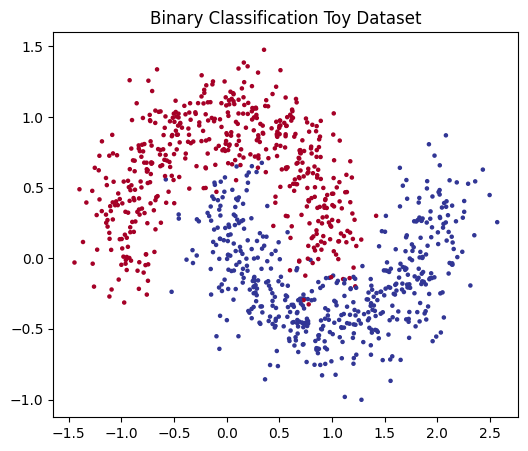

In [2]:
# creating toy dataset 
X, y = make_moons(n_samples=1000,
                  noise=0.2,
                  random_state=RANDOM_STATE)

# convert dataset into tensors
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

# splitting dataset into train test sets
x_moon_train, x_moon_test, y_moon_train, y_moon_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=RANDOM_STATE)
print(x_moon_train.shape, y_moon_train.shape)
print(x_moon_test.shape, y_moon_test.shape)

# visualize! visualize!! visualize!!!
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, s=5, cmap=plt.cm.RdYlBu)
plt.title('Binary Classification Toy Dataset')
plt.show()


In [3]:
# creating a model class

class BinaryClassificationNet(nn.Module):
    def __init__(self, n_features=2):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(n_features, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
    
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

torch.manual_seed(RANDOM_STATE)
mdl = BinaryClassificationNet(n_features=2).to(device)
summary(mdl, (x_moon_train.shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 800, 8]              24
              ReLU-2               [-1, 800, 8]               0
            Linear-3              [-1, 800, 16]             144
              ReLU-4              [-1, 800, 16]               0
            Linear-5               [-1, 800, 8]             136
              ReLU-6               [-1, 800, 8]               0
            Linear-7               [-1, 800, 1]               9
Total params: 313
Trainable params: 313
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.40
Params size (MB): 0.00
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


In [4]:
# define loss, optimizer, and accuracy metric
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(mdl.parameters(), lr=.1)

accuracy = Accuracy(task='binary')

Epoch: 0  |  Accuracy: 50.00%  |  Loss: 0.69949  |  Test Accuracy: 50.00%  |  Test Loss: 0.69906


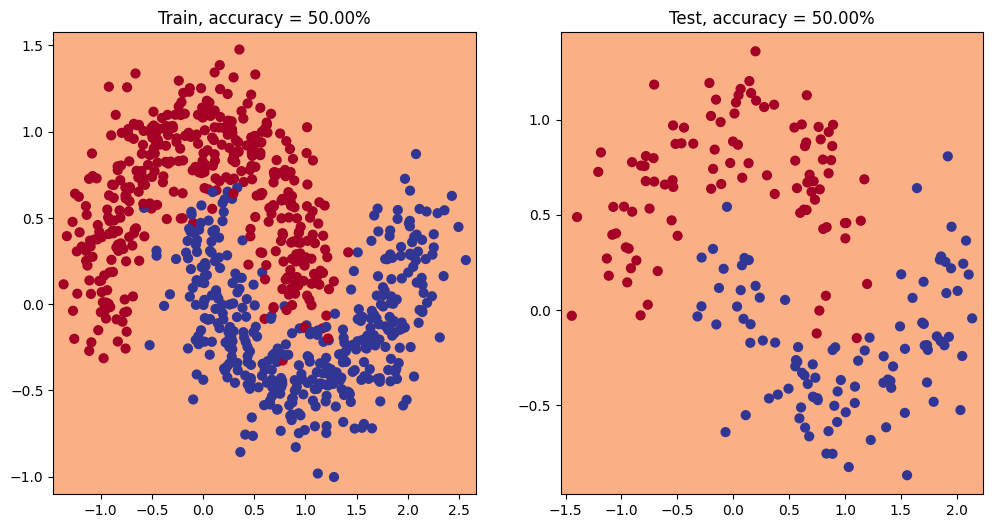

Epoch: 10  |  Accuracy: 50.00%  |  Loss: 0.68974  |  Test Accuracy: 50.00%  |  Test Loss: 0.68961
Epoch: 20  |  Accuracy: 50.00%  |  Loss: 0.68021  |  Test Accuracy: 50.00%  |  Test Loss: 0.67973
Epoch: 30  |  Accuracy: 50.00%  |  Loss: 0.66801  |  Test Accuracy: 50.00%  |  Test Loss: 0.66701
Epoch: 40  |  Accuracy: 50.00%  |  Loss: 0.65323  |  Test Accuracy: 50.00%  |  Test Loss: 0.65161
Epoch: 50  |  Accuracy: 55.50%  |  Loss: 0.63569  |  Test Accuracy: 56.50%  |  Test Loss: 0.63266
Epoch: 60  |  Accuracy: 66.37%  |  Loss: 0.61364  |  Test Accuracy: 66.50%  |  Test Loss: 0.60803
Epoch: 70  |  Accuracy: 70.00%  |  Loss: 0.58621  |  Test Accuracy: 71.00%  |  Test Loss: 0.57625
Epoch: 80  |  Accuracy: 71.25%  |  Loss: 0.55307  |  Test Accuracy: 73.00%  |  Test Loss: 0.53668
Epoch: 90  |  Accuracy: 74.12%  |  Loss: 0.51681  |  Test Accuracy: 80.50%  |  Test Loss: 0.49339
Epoch: 100  |  Accuracy: 76.38%  |  Loss: 0.47997  |  Test Accuracy: 83.00%  |  Test Loss: 0.44843
Epoch: 110  |  Accu

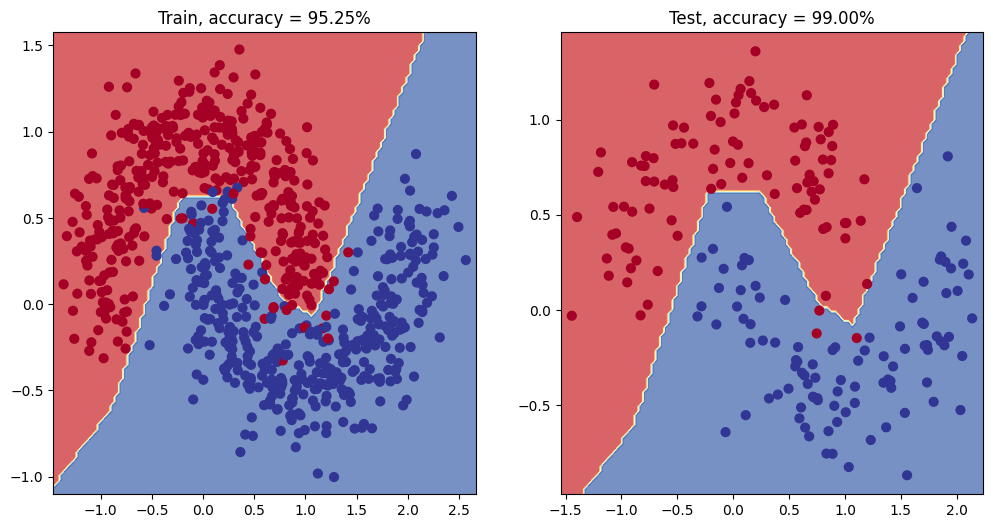

In [5]:
# training and testing loop
epochs = 1000
for epoch in range(epochs):
    # train
    mdl.train()
    optimizer.zero_grad()
    logits = mdl(x_moon_train).squeeze()
    preds = torch.round(logits)
    acc = accuracy(preds, y_moon_train)
    loss = criterion(logits, y_moon_train)
    loss.backward()
    optimizer.step()

    if epoch%10 == 0:
        mdl.eval()
        with torch.inference_mode():
            test_logits = mdl(x_moon_test).squeeze()
            test_preds = torch.round(test_logits)
            test_acc = accuracy(test_preds, y_moon_test)
            test_loss = criterion(test_logits, y_moon_test)
        
        print(
            f'Epoch: {epoch}  |  Accuracy: {acc.item()*100:.2f}%  |  Loss: {loss:.5f}  |  Test Accuracy: {test_acc.item()*100:.2f}%  |  Test Loss: {test_loss:.5f}'
        )

        if epoch%(epochs-10) == 0:
            # decision boundary
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.title(f'Train, accuracy = {acc.item()*100:.2f}%')
            plot_decision_boundary(mdl, x_moon_train, y_moon_train)
            plt.subplot(1,2,2)
            plt.title(f'Test, accuracy = {test_acc.item()*100:.2f}%')
            plot_decision_boundary(mdl, x_moon_test, y_moon_test)
            plt.show()

    

### multi-class classification: cs231n spiral dataset

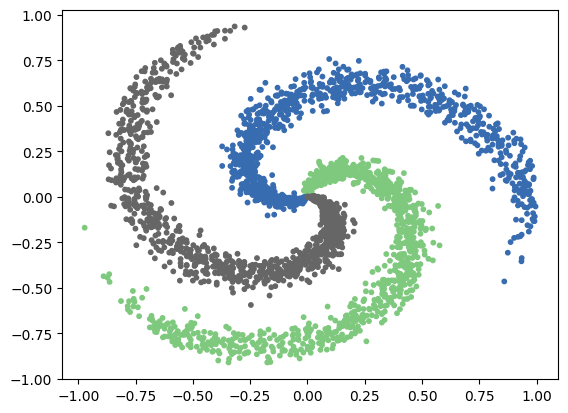

In [7]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=plt.cm.Accent)
plt.show()

In [8]:
# convert data into torch 
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.long).to(device)

# splitting data into train and test sets
x_spiral_train, x_spiral_test, y_spiral_trian, y_spiral_test = train_test_split(X, y, test_size=.2, shuffle=True, stratify=y, random_state=RANDOM_STATE)
print(x_spiral_train.shape, y_spiral_trian.shape)
print(x_spiral_test.shape, y_spiral_test.shape)

torch.Size([2400, 2]) torch.Size([2400])
torch.Size([600, 2]) torch.Size([600])


In [9]:
# create multi-class classification

class MultiClassificationNet(nn.Module):
    def __init__(self, n_features=2, n_classes=3):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(n_features, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, n_classes)
        )

    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

torch.manual_seed(RANDOM_STATE)
mdl2 = MultiClassificationNet(n_features=2, n_classes=3).to(device)
summary(mdl2, (x_spiral_train.shape))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 2400, 8]              24
              ReLU-2              [-1, 2400, 8]               0
            Linear-3             [-1, 2400, 16]             144
              ReLU-4             [-1, 2400, 16]               0
            Linear-5             [-1, 2400, 16]             272
              ReLU-6             [-1, 2400, 16]               0
            Linear-7              [-1, 2400, 8]             136
              ReLU-8              [-1, 2400, 8]               0
            Linear-9              [-1, 2400, 3]              27
Total params: 603
Trainable params: 603
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 1.81
Params size (MB): 0.00
Estimated Total Size (MB): 1.83
---------------------------------------------------

In [10]:
# define loss, optimizer, and evaluation metrics
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(mdl2.parameters(), lr=0.01)

accuracy = Accuracy(task='multiclass', num_classes=3)
precision = Precision(task='multiclass', num_classes=3)
recall = Recall(task='multiclass', num_classes=3)


Epoch: 0  |  Train Loss: 1.12624  |  Train Accuracy: 33.33  |  Train Precision: 33.33  |  Train Recall: 33.33
Epoch: 0  |  Test Loss: 1.12059  |  Test Accuracy: 33.33  |  Test Precision: 33.33  |  Test Recall: 33.33



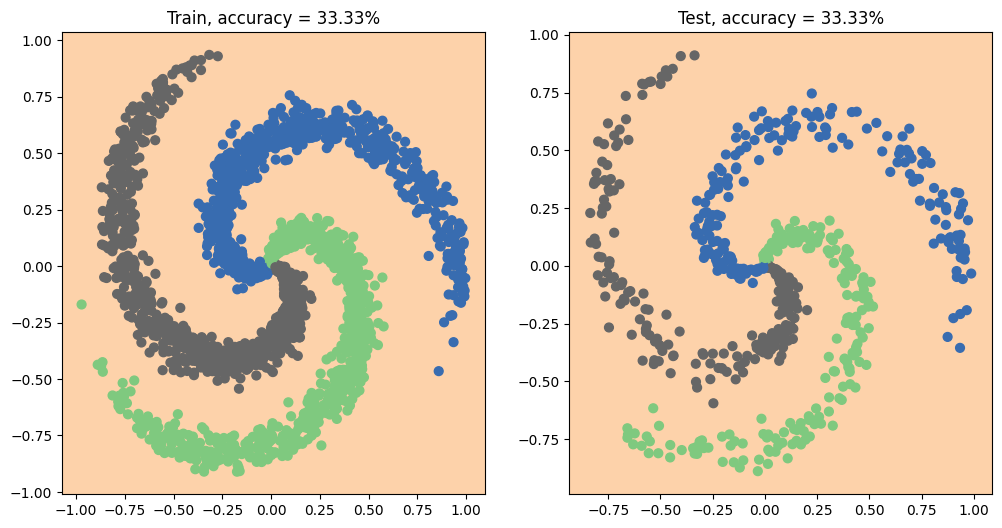

Epoch: 10  |  Train Loss: 1.08312  |  Train Accuracy: 33.33  |  Train Precision: 33.33  |  Train Recall: 33.33
Epoch: 10  |  Test Loss: 1.07606  |  Test Accuracy: 33.33  |  Test Precision: 33.33  |  Test Recall: 33.33

Epoch: 20  |  Train Loss: 0.98015  |  Train Accuracy: 49.54  |  Train Precision: 49.54  |  Train Recall: 49.54
Epoch: 20  |  Test Loss: 0.95960  |  Test Accuracy: 49.17  |  Test Precision: 49.17  |  Test Recall: 49.17

Epoch: 30  |  Train Loss: 0.85770  |  Train Accuracy: 54.08  |  Train Precision: 54.08  |  Train Recall: 54.08
Epoch: 30  |  Test Loss: 0.84502  |  Test Accuracy: 54.83  |  Test Precision: 54.83  |  Test Recall: 54.83

Epoch: 40  |  Train Loss: 0.77123  |  Train Accuracy: 60.62  |  Train Precision: 60.62  |  Train Recall: 60.62
Epoch: 40  |  Test Loss: 0.75684  |  Test Accuracy: 63.67  |  Test Precision: 63.67  |  Test Recall: 63.67

Epoch: 50  |  Train Loss: 0.60606  |  Train Accuracy: 75.38  |  Train Precision: 75.38  |  Train Recall: 75.38
Epoch: 50  | 

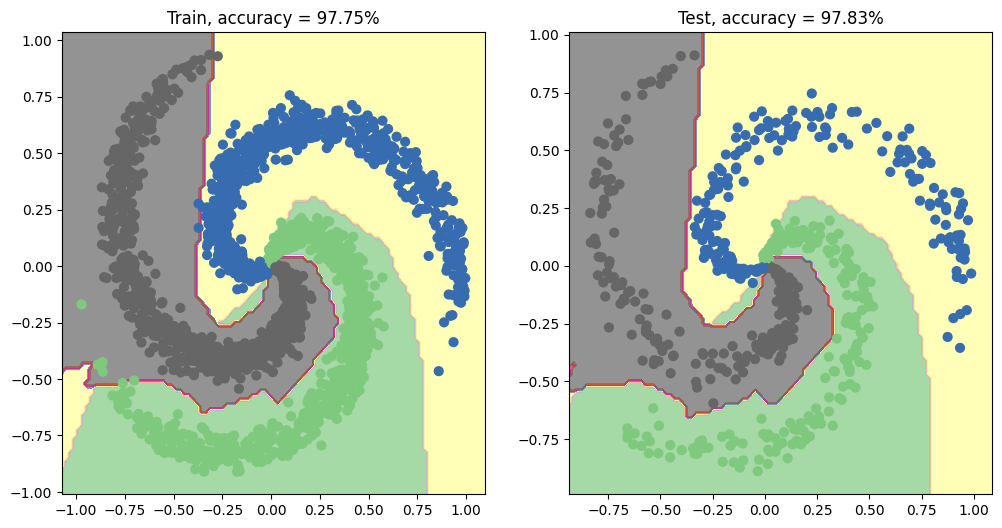

In [11]:
# training and testing loop
epochs = 200

for epoch in range(epochs):
    # training 
    mdl2.train()
    optimizer.zero_grad()
    logits = mdl2(x_spiral_train)
    preds = torch.softmax(logits, dim=1).argmax(dim=1)
    loss = criterion(logits, y_spiral_trian)
    loss.backward()
    optimizer.step()

    if epoch%10 == 0:
        # testing 
        mdl2.eval()
        with torch.inference_mode():
            test_logits = mdl2(x_spiral_test)
            test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
            test_loss = criterion(test_logits, y_spiral_test)
        
        print( # train
            f'Epoch: {epoch}  |  Train Loss: {loss:.5f}  |  Train Accuracy: {accuracy(preds, y_spiral_trian)*100:.2f}  |  Train Precision: {precision(preds, y_spiral_trian)*100:.2f}  |  Train Recall: {recall(preds, y_spiral_trian)*100:.2f}'
        )
        print( # test
            f'Epoch: {epoch}  |  Test Loss: {test_loss:.5f}  |  Test Accuracy: {accuracy(test_preds, y_spiral_test)*100:.2f}  |  Test Precision: {precision(test_preds, y_spiral_test)*100:.2f}  |  Test Recall: {recall(test_preds, y_spiral_test)*100:.2f}'
        )
        print()

        if epoch%(epochs-10) == 0:
            # decision boundary
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.title(f'Train, accuracy = {accuracy(preds, y_spiral_trian)*100:.2f}%')
            plot_decision_boundary(mdl2, x_spiral_train, y_spiral_trian)
            plt.subplot(1,2,2)
            plt.title(f'Test, accuracy = {accuracy(test_preds, y_spiral_test)*100:.2f}%')
            plot_decision_boundary(mdl2, x_spiral_test, y_spiral_test)
            plt.show()

   